# Practical 2

In [1]:
# To make plots appear better in Jupyter
library(repr)
options(repr.plot.width=15, repr.plot.height=8)

## Question 2.1

This practical question aims to analyse a high dimensional microarray data set called `eyedata`, available on Ultra, which contains gene expression data of 200 genes for 120 samples, along with the `TRIM32` gene of 120 samples as the response variable of interest. The data originates from microarray experiments of mammalian eye tissue samples. The first variable (column) in data is the `TRIM32` gene as the response variable, and the other variables (columns) are the 200 genes as the covariates, quantified for 120 samples (observations in rows).

The main objectives of this study were to find out which genes are associated with the `TRIM32` and to predict the expression levels of `TRIM32` from the expression levels of the 200 genes measured in the microarray experiment.

**a)** Load the eyedata into R using the command `load(file="eyedata.rda")`. Note that you may need to paste the right directory of the data file in your computer. For example, `load(file="C:/Users/bvft24/Desktop/eyedata.rda")`.

In [2]:
load(file="eyedata.rda")

In [3]:
head(eyedata)

,Y,X1377,X1748,X2487,X2679,X2789,X2875,X3244,X3375,X3732,⋯,X29773,X29842,X29896,X29912,X29984,X30031,X30037,X30078,X30116,X30141
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.421887,3.676134,3.605076,5.279393,4.837170,6.639725,5.160537,5.623428,6.100658,7.427404,⋯,3.801344,9.813710,5.669208,6.610721,7.960745,9.464745,4.299718,9.155904,6.961120,3.979533
2,8.358945,3.582209,3.655323,5.492616,5.074044,6.824746,5.377262,5.328632,6.041746,7.472607,⋯,3.643050,9.770520,5.768106,6.474511,7.961689,9.406859,4.328952,9.138202,7.057102,4.160436
3,8.405884,3.851962,3.872546,5.183385,4.565908,6.602236,5.299639,5.537173,5.976256,7.726482,⋯,3.726864,9.689681,5.895465,6.510575,7.730275,9.391663,4.209071,9.161966,7.061014,3.873777
4,8.290472,4.129914,3.900259,5.312923,5.109800,6.792640,5.353543,4.891386,6.115845,7.448396,⋯,3.750531,9.805812,5.867556,6.636654,7.741557,9.018556,4.404290,8.987091,6.994613,4.088951
5,8.273447,3.880411,3.754434,5.145420,5.192902,6.522848,5.390876,5.384595,6.148449,7.754104,⋯,3.606397,9.974162,5.757535,6.480451,8.043683,9.476103,4.403218,9.303551,7.086853,3.970845
6,8.390450,3.698297,3.504323,5.100727,4.493297,6.104322,5.316822,5.680713,5.730433,7.667770,⋯,3.451599,10.014314,5.127233,6.045464,8.386789,9.575282,4.182038,9.452751,7.678930,3.661352


**b)** In R, create the response variable vector $\boldsymbol{Y}$ being the first column of eyedata. Also, create the covariates design matrix $\boldsymbol{X}$ being all columns of `eyedata` except the first column. Do centre both $\boldsymbol{Y}$ and $\boldsymbol{X}$ using the R function `scale` so that all the covariates and the response variable have zero mean (no need to scale them having variance 1).

In [4]:
# ?scale

In [5]:
Y <- scale(eyedata[,1], center=TRUE, scale=FALSE)
X <- as.matrix(scale(eyedata[,-1], center=TRUE, scale=FALSE))

**c)** Consider a linear regression model with $\boldsymbol{Y}$ and $\boldsymbol{X}$. Show that the OLS method fails to work here. For this, first show that $\boldsymbol{X}$ does not have full column rank by computing the rank of $\boldsymbol{X}$ using the R function `qr`. Then calculate the inverse of matrix $\boldsymbol{X}^T \boldsymbol{X}$ using the R function `solve` and observe that the inverse does not exist due to singularity as $n<p$. Despite the OLS does not work properly, apply it using the R function `lm` and interpret what goes wrong in the results.

_Aside: The QR decompostion of a matrix is factoring it into an orthonormal matrix $Q$ and an upper triangular matrix $T$._

In [6]:
# ?qr

In [7]:
QRDecomp <- qr(X)
rank <- QRDecomp$rank

rank

[1] 119

In [8]:
dim(X)[1]  # dimensions of X

[1] 120

So $\boldsymbol{X}$ does not have full column rank.

In [9]:
# ?solve

In [10]:
# solve(t(X) %*% X)

`t(X) %*% X` is singular.

In [11]:
lm(Y ~ -1+X)  # do not add intercept


Call:
lm(formula = Y ~ -1 + X)

Coefficients:
    XX1377      XX1748      XX2487      XX2679      XX2789      XX2875  
 1.8090299  -0.3231615   0.1975672  -0.9596253   0.5592576  -0.2076769  
    XX3244      XX3375      XX3732      XX5892      XX6222      XX6242  
 0.6193757  -1.1923821   0.3361038   0.9226667  -0.2086731  -0.0915137  
    XX6247      XX6359      XX6690      XX7069      XX7261      XX7941  
-0.2394703  -0.5996492   0.2395472   0.4630071  -0.9328975   1.1350446  
    XX8675      XX8835      XX9061      XX9096      XX9187      XX9303  
-0.1337140   0.2231279  -0.5572350  -0.8861383   0.6201707   0.6057806  
    XX9340      XX9972     XX10144     XX10196     XX10326     XX10438  
 0.5467226  -0.3442379   1.8560155   0.7493054   0.3989738   0.2059987  
   XX10540     XX10693     XX10780     XX11024     XX11421     XX11609  
-1.1014382   0.1421717   1.7531155   0.6140574  -0.2778989  -0.4950593  
   XX11711     XX11719     XX11928     XX11995     XX12081     XX12085  
-0.2

The `lm` function only uses the first $n$ variables.

**d)** Apply the ridge regression model with $\boldsymbol{Y}$ and $\boldsymbol{X}$ using the R function `glmnet` with the regularisation parameter set to $\lambda=2$. You may need to first install the R package `glmnet` and load it in R using the following commands:
```r
install.packages("glmnet")
library(glmnet)
```
For this case of $\lambda=2$, extract the ridge estimates of regression coefficients $\boldsymbol{\beta}$ using the R function `coef`.

Now, choose an optimal value of $\lambda$ for ridge regression by applying the cross validation (CV) using the R function `cv.glmnet` which by default minimises the deviance. Plot the CV output using the R function `plot`. Fit the ridge regression model to the data with this optimal value of $\lambda$ and extract the estimates of regression coefficients $\boldsymbol{\beta}$. What do you observe when comparing the estimates with the previous case of $\lambda=2$?

In [12]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-8



In [13]:
# ?glmnet

In [14]:
ridge_model <- glmnet(x = X, y = Y, alpha = 0, lambda = 2)

In [15]:
# ?cv.glmnet

In [16]:
ridge_model_cv <- cv.glmnet(x = X, y = Y, alpha = 0)

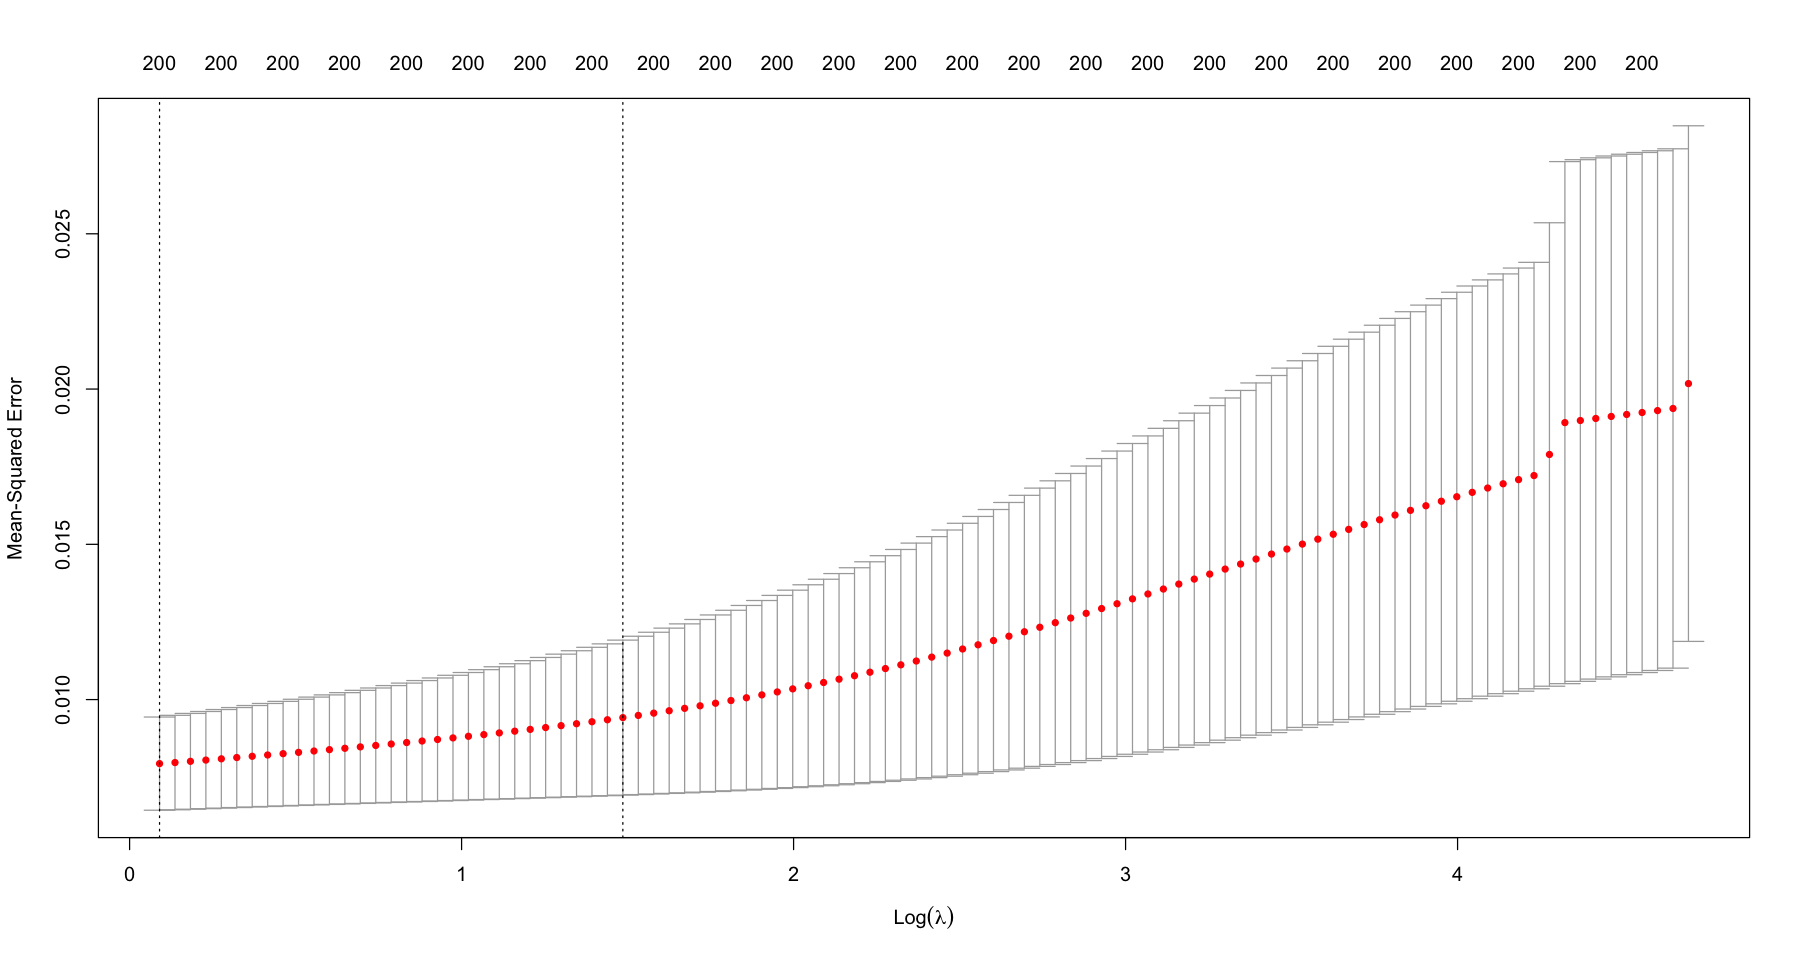

In [17]:
plot(ridge_model_cv)

In [18]:
lambda_ridge <- ridge_model_cv$lambda.min
lambda_ridge

[1] 1.094429

In [19]:
log(lambda_ridge)

[1] 0.09023284

In [20]:
M1 <- glmnet(X, Y, alpha=0, lambda=lambda_ridge)

In [21]:
betahat_ridge <- coef(M1)
betahat_ridge_nointercept <- betahat_ridge[-1]

In [22]:
head(betahat_ridge, 10)

10 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept) -3.651960e-16
X1377       -1.834699e-03
X1748       -2.508342e-03
X2487       -1.488623e-04
X2679       -1.888010e-03
X2789       -2.348920e-03
X2875       -1.389583e-03
X3244       -5.426205e-04
X3375       -1.256738e-03
X3732        2.272933e-03

**e)** Apply the lasso regression with $\boldsymbol{Y}$ and $\boldsymbol{X}$ using the R function `glmnet` with an optimal value of $\lambda$ being chosen using the cross validation with the R function `cv.glmnet`. Plot the CV output using the R function `plot`. Extract the lasso estimates of parameters $\boldsymbol{\beta}$ and compare with the ridge estimates in terms of the sparsity of solution.

In [23]:
lasso_model_cv <- cv.glmnet(x = X, y = Y, alpha = 1)

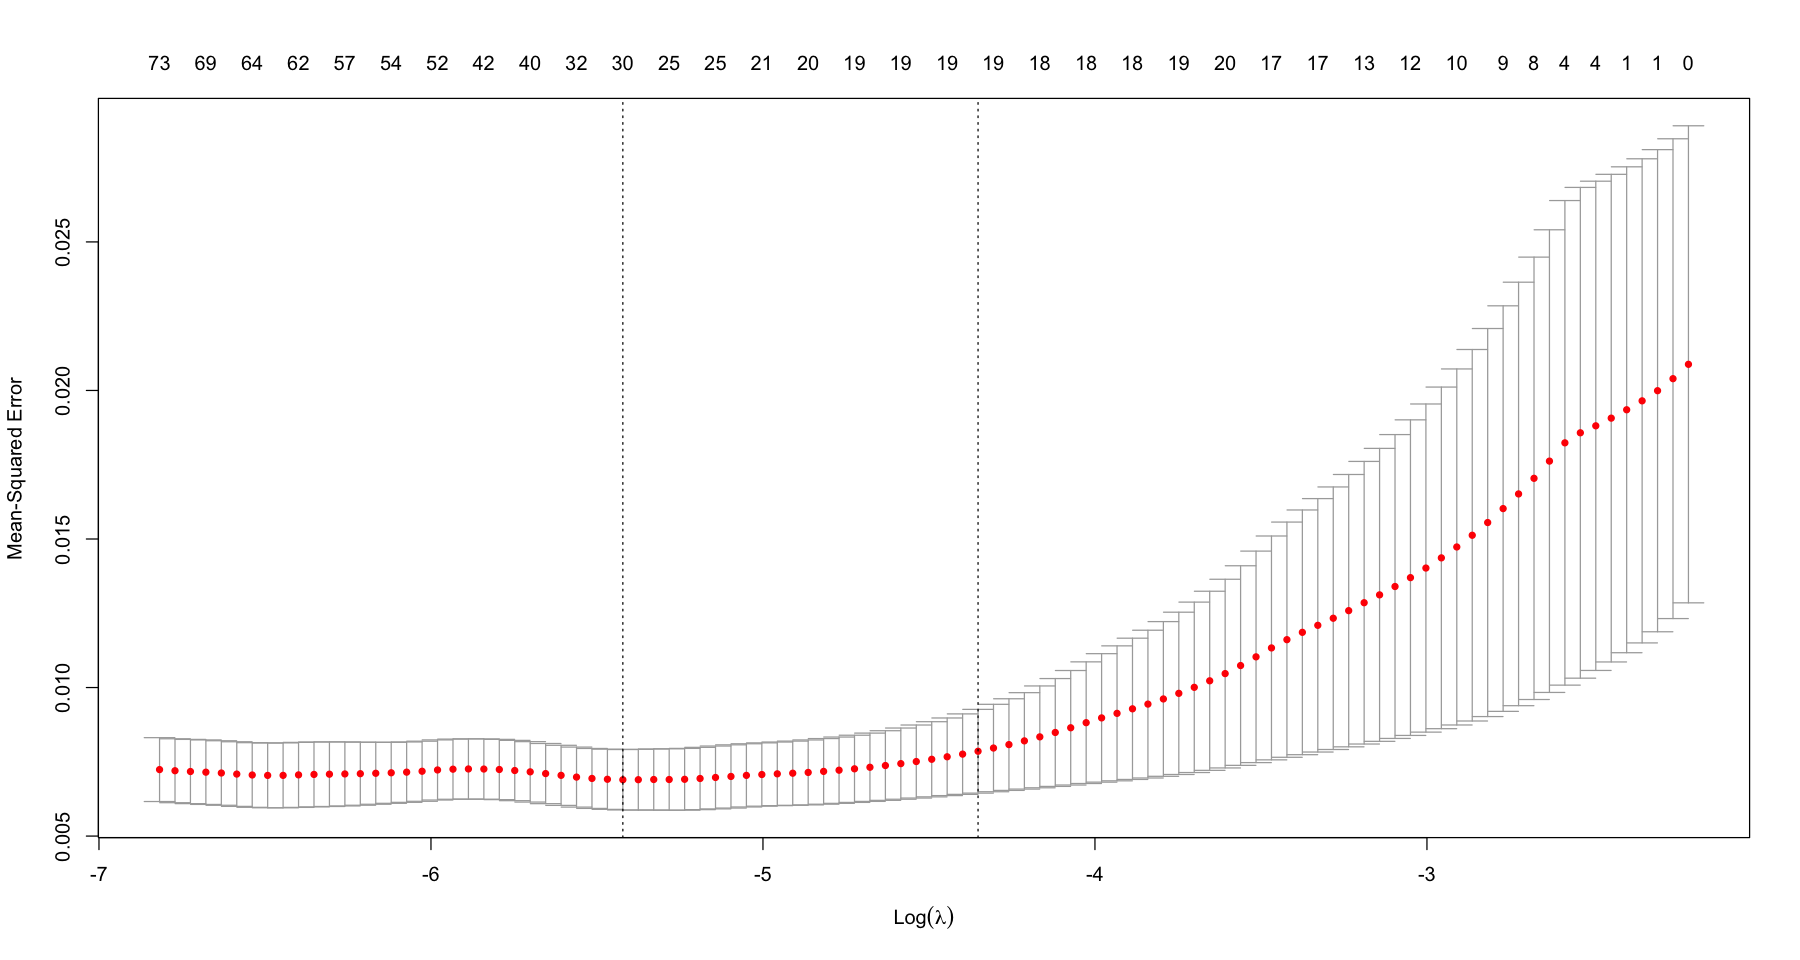

In [24]:
plot(lasso_model_cv)

In [25]:
lambda_lasso <- lasso_model_cv$lambda.min
lambda_lasso

[1] 0.004418229

In [26]:
log(lambda_lasso)

[1] -5.422016

**CV Output**

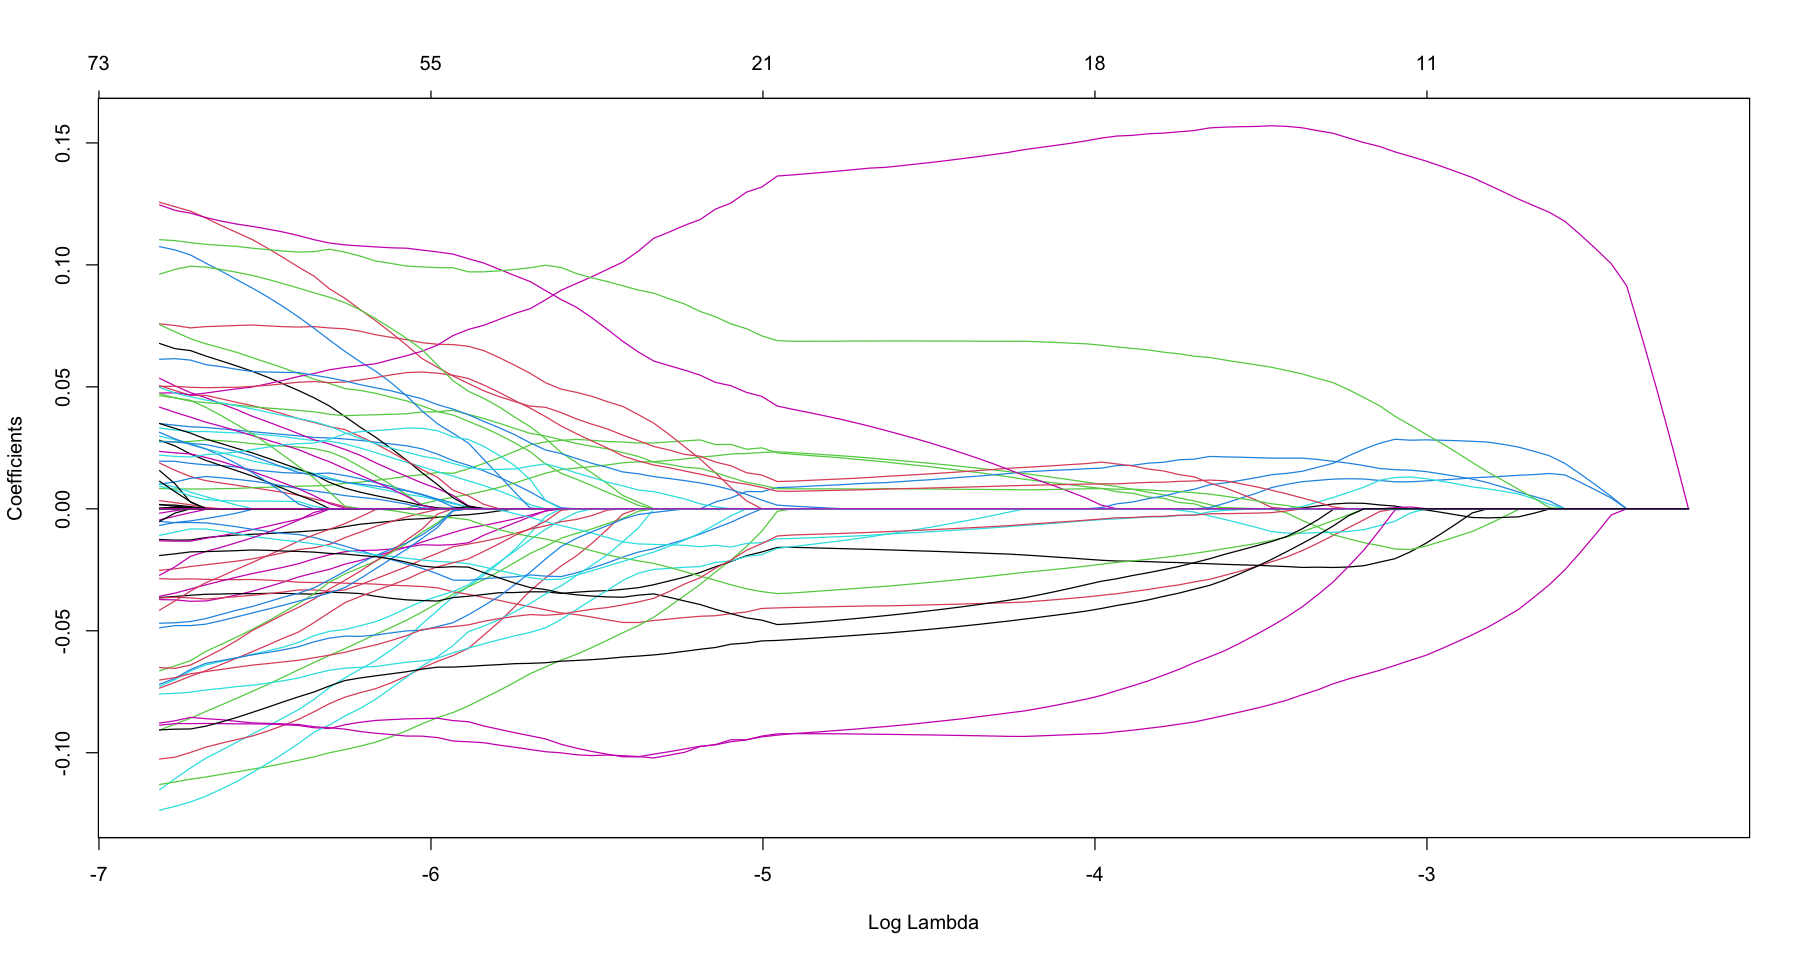

In [27]:
plot(lasso_model_cv$glmnet.fit, xvar="lambda")

In [28]:
M2 <- glmnet(X, Y, alpha=1, lambda=lambda_lasso)

In [29]:
betahat_lasso <- coef(M2)

In [30]:
betahat_lasso_nointercept <- betahat_lasso[-1]

In [31]:
head(betahat_lasso, 10)

10 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept) -4.669059e-16
X1377        .           
X1748        .           
X2487        .           
X2679        .           
X2789        .           
X2875        .           
X3244        .           
X3375        .           
X3732        .           

**f)** Randomly partition the data to training data $\left(70 \%\right.$, say $\boldsymbol{Y}_{\text {train }}$ and $\left.\boldsymbol{X}_{\text {train }}\right)$ and test data (30\%, say $\boldsymbol{Y}_{\text {test }}$ and $\left.\boldsymbol{X}_{\text {test }}\right)$. Apply ridge and lasso regression to the training data, both with $\lambda$ being chosen by CV, and then use the fitted models to predict the response values in the test data. Calculate the mean squared error of predictions for the two methods and comment which method provides better predictions and discuss why.

**Train/Test Split**

In [32]:
set.seed(2)

n <- nrow(eyedata)
train_rows <- sample(1:n, 0.7*n)

X.train <- X[train_rows, ]
X.test <- X[-train_rows, ]
Y.train <- Y[train_rows]
Y.test <- Y[-train_rows]

**Ridge**

In [33]:
CV1 <- cv.glmnet(X.train, Y.train, alpha=0)
lambda_ridge_train <- CV1$lambda.min

M1 <- glmnet(X.train, Y.train, alpha=0)
Yhat_ridge <- predict(M1, X.test, s=lambda_ridge_train)

MSPE_ridge <- mean((Y.test - Yhat_ridge)^2)
MSPE_ridge

[1] 0.004749165

**Lasso**

In [34]:
CV2 <- cv.glmnet(X.train, Y.train, alpha=1)
lambda_lasso_train <- CV2$lambda.min

M2 <- glmnet(X.train, Y.train, alpha=1)
Yhat_lasso <- predict(M2,X.test,s=lambda_lasso_train)

MSPE_lasso <- mean((Y.test - Yhat_lasso)^2)
MSPE_lasso

[1] 0.004974798

## Question 2.2

Consider the high dimensional data set called `riboflavin`, available on Ultra, which is obtained from a high-throughput genomic study concerning the riboflavin (vitamin $B_2$ ) production by bacillus subtilis. The main objective of the study was to find out which genes are associated with the production rate of vitamin $B_2$. The data set contains 71 samples and 4088 covariates corresponding to 4088 genes, along with the logarithm of riboflavin production rate as response variable.

**a)** First, load the `riboflavin` data into R environment using the command `load(file="riboflavin.rda")`. Again you might need to specify the right directory of the data file in your computer. Then, create the response variable vector $\boldsymbol{Y}$ from this data set using the command `Y <- riboflavin$y`. Also, create the covariates design matrix $\boldsymbol{X}$ using the command `X <- riboflavin$x`. Center the covariates $\boldsymbol{X}$ to have zero mean but not the response variable $\boldsymbol{Y}$.

In [35]:
load(file="riboflavin.rda")

In [36]:
X <- riboflavin$x
Y <- riboflavin$y

In [37]:
dim(X)

[1]   71 4088

In [38]:
length(Y)

[1] 71

In [39]:
X <- scale(X, center=TRUE, scale=FALSE)

In [40]:
n <- nrow(X)
p <- ncol(X)

**b)** Calculate the pairwise correlations between covariates (or genes) to see if they are correlated. For this, use the R function `cor`. Create a histogram of the pairwise correlations using the R function `hist`. What do you observe here?

In [41]:
corrX <- cor(X)
#corrX <- round(corrX,4)

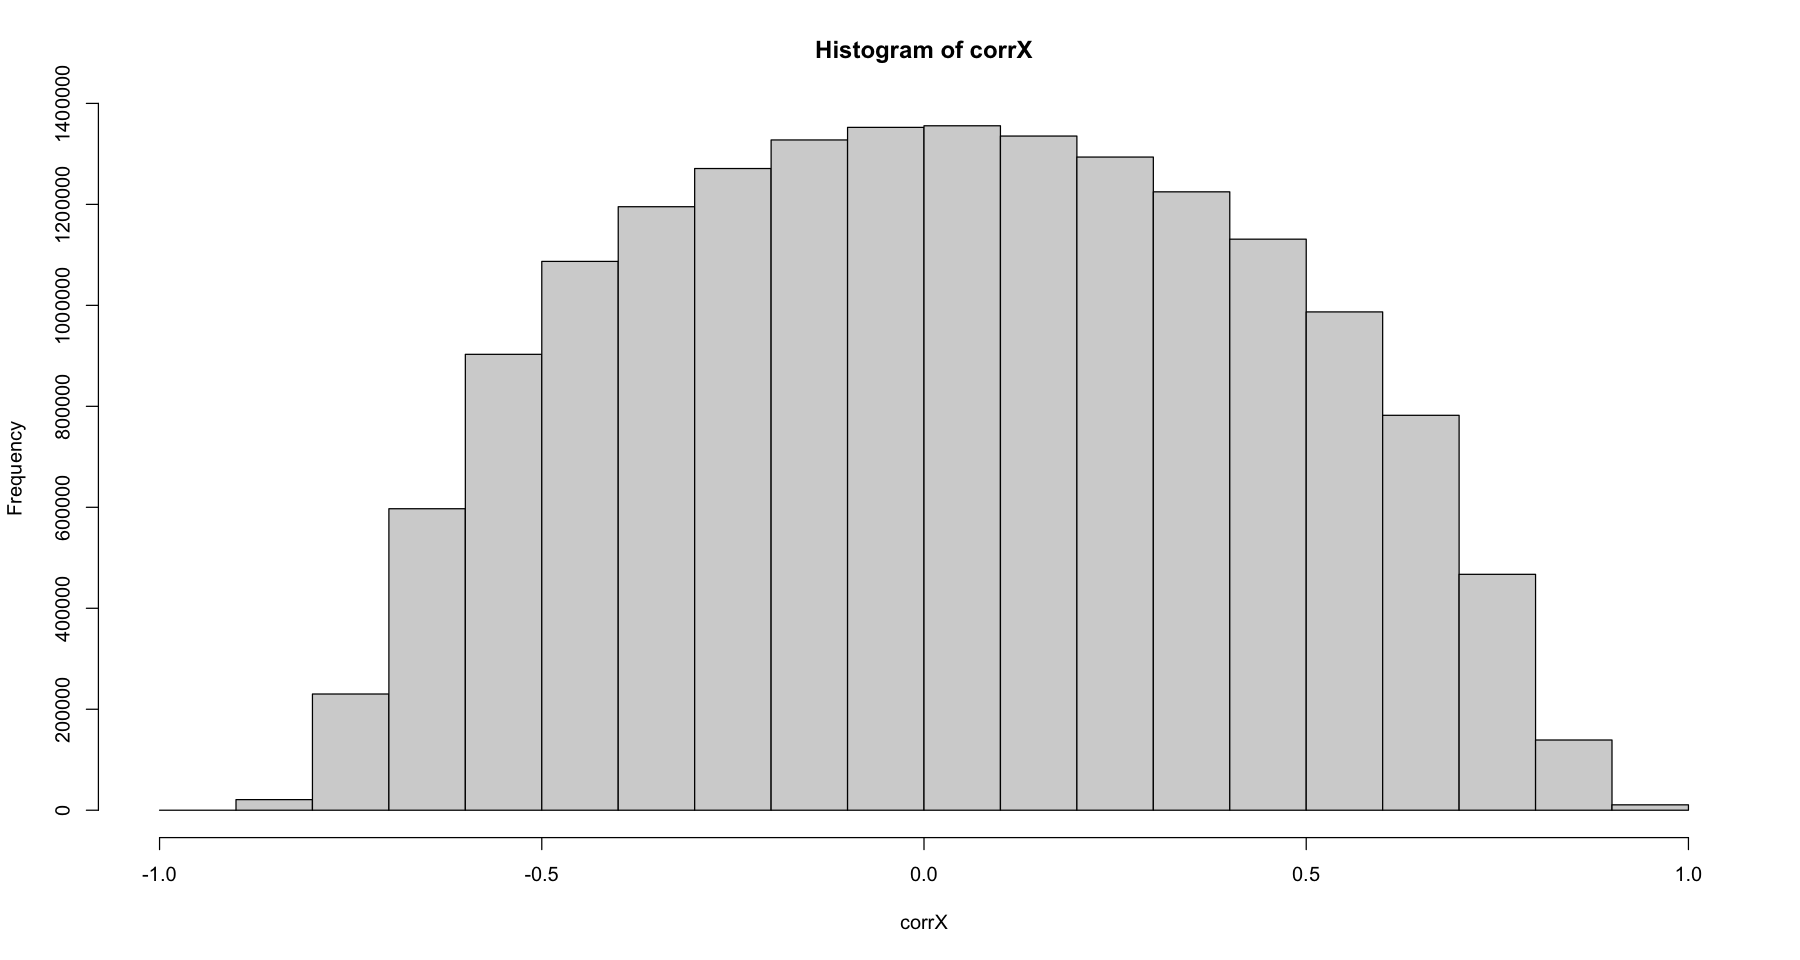

In [42]:
hist(corrX)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,AADK_at,AADK_at,1.0000000
2,AAPA_at,AADK_at,0.3946231
3,ABFA_at,AADK_at,0.4285125
4,ABH_at,AADK_at,0.6568193
5,ABNA_at,AADK_at,0.5231806
6,ABRB_at,AADK_at,0.4908712


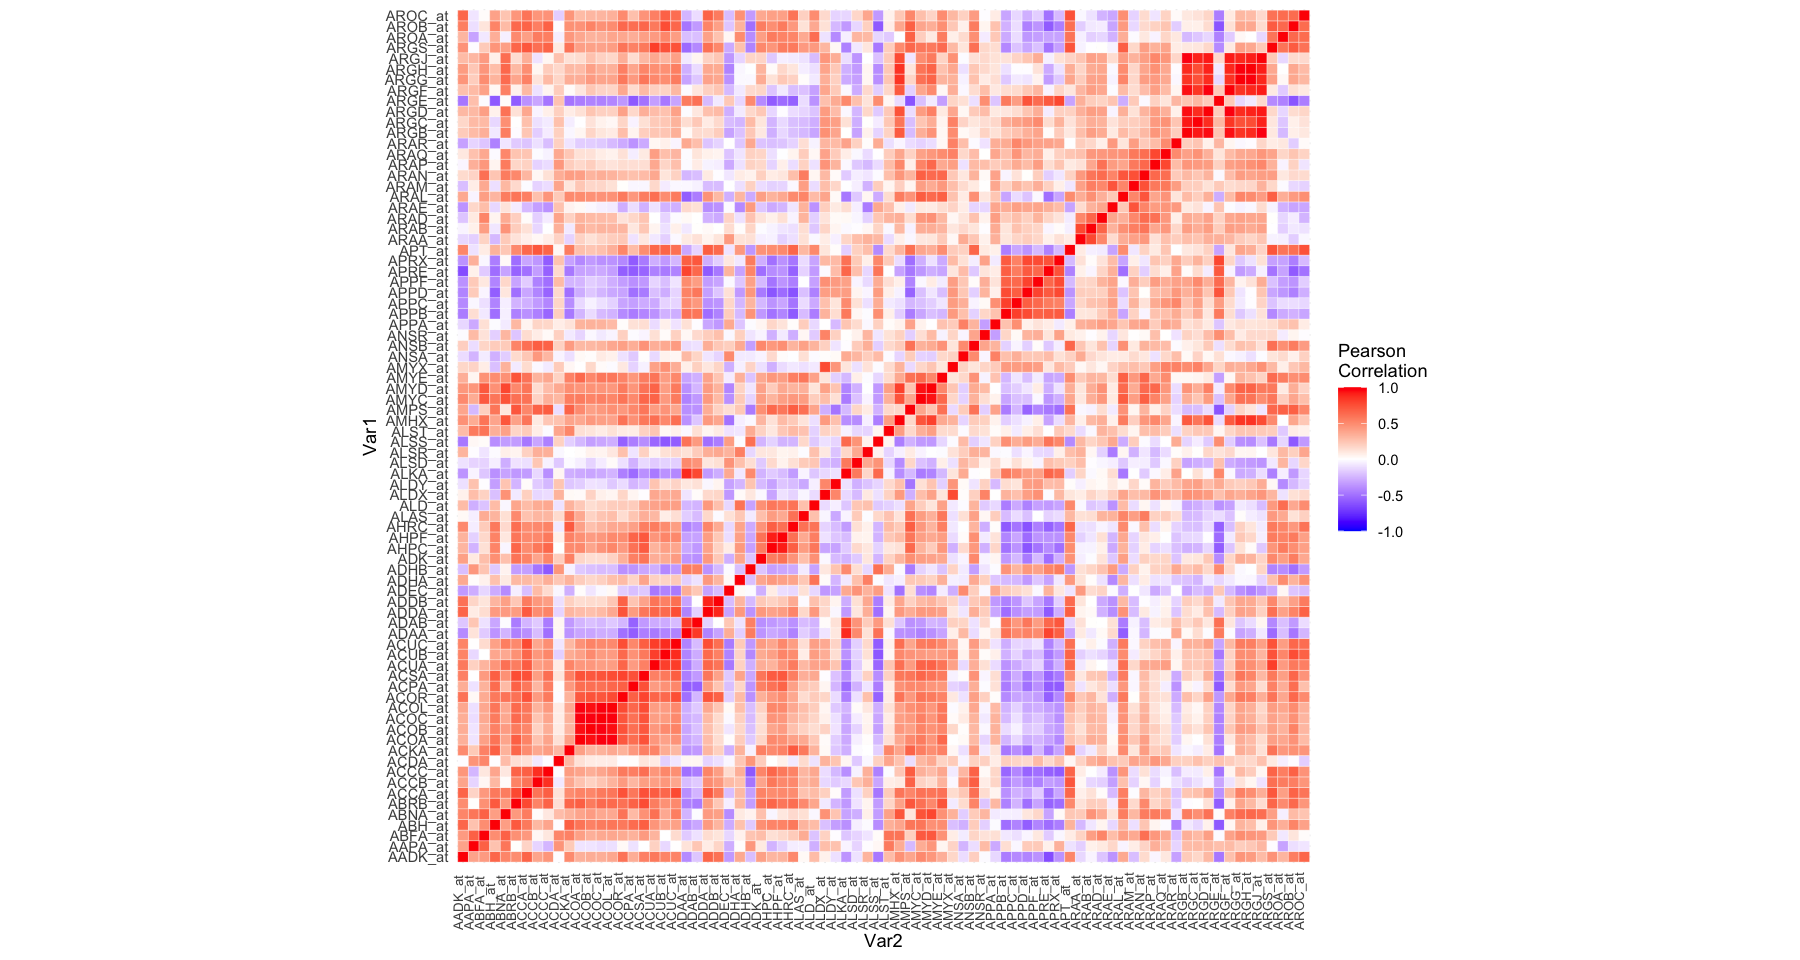

In [43]:
library(reshape2)
corrX <- corrX[1:80,1:80]
melted_corrX <- melt(corrX)
head(melted_corrX)
library(ggplot2)
ggplot(data = melted_corrX, aes(Var2, Var1, fill = value))+
geom_tile(color = "white")+
scale_fill_gradient2(low = "blue", high = "red", mid = "white",
midpoint = 0, limit = c(-1,1), space = "Lab",
name="Pearson\nCorrelation") +
theme_minimal()+
theme(axis.text.x = element_text(angle = 90, vjust = 0,size = 8, hjust = 0))+
coord_fixed()

**c)** Apply the ridge and lasso regression to the `riboflavin` data, both with $\lambda$ being chosen by CV. Interpret the results.

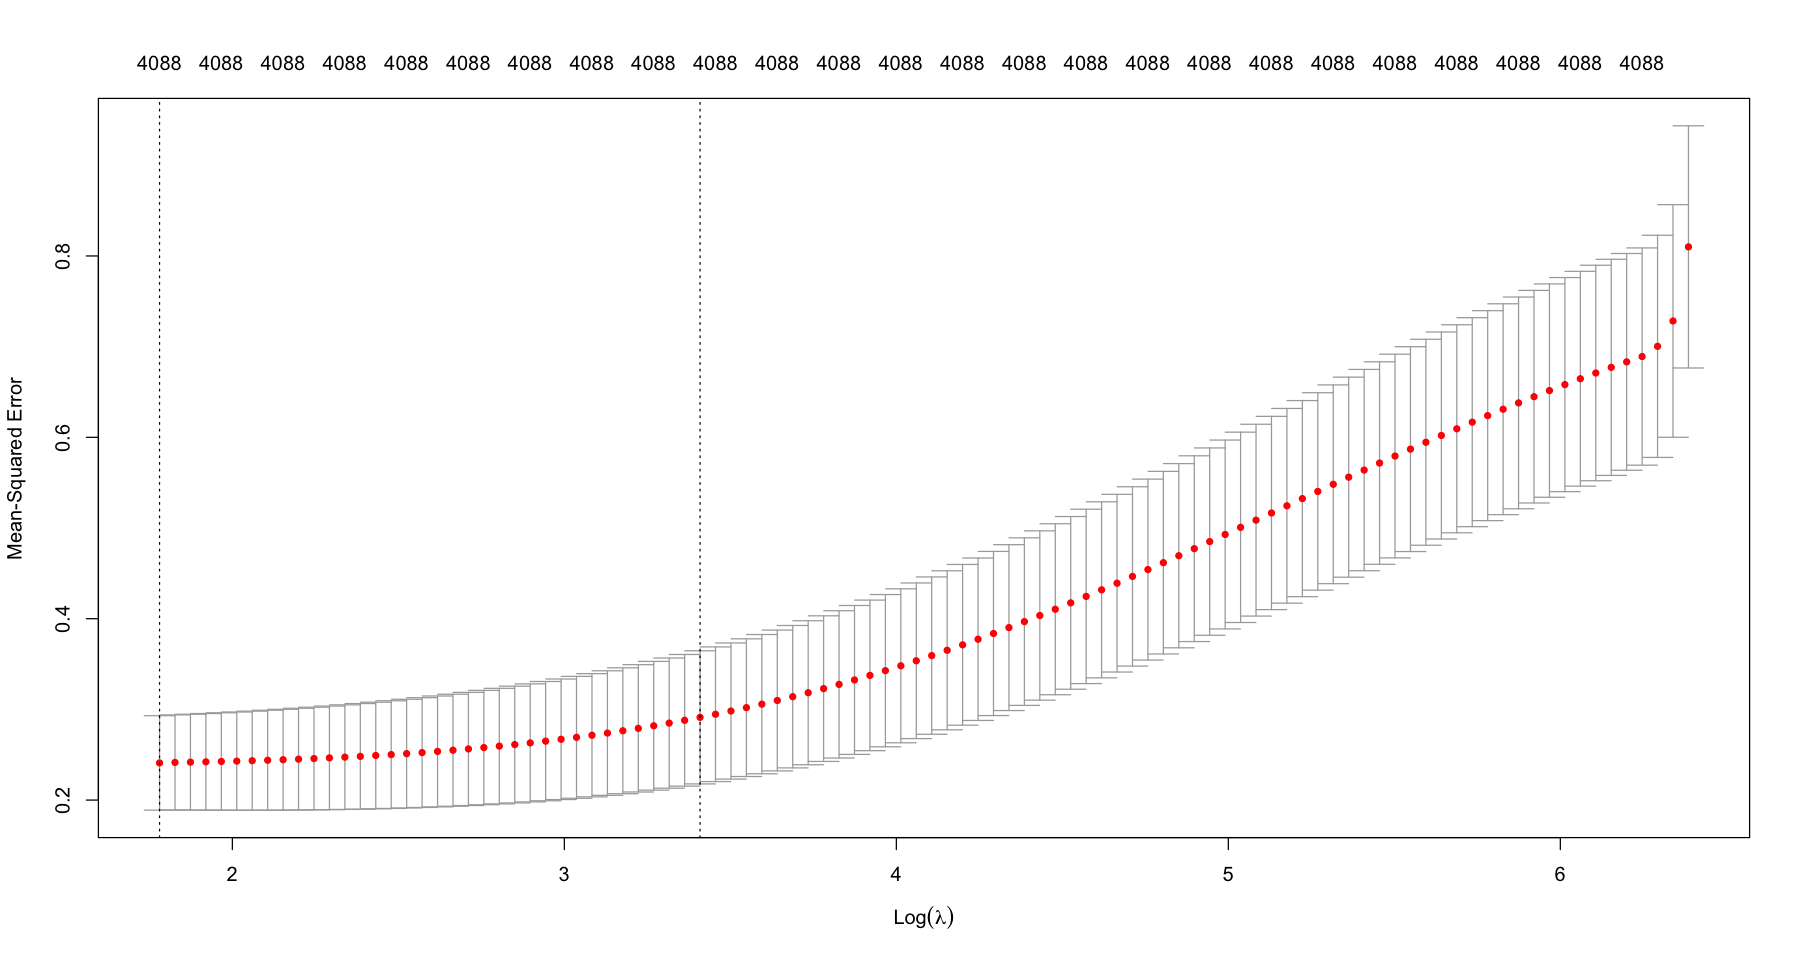

In [44]:
CVR <- cv.glmnet(X, Y, alpha=0)
lambda_ridge <- CVR$lambda.min
plot(CVR)

MR <- glmnet(X, Y, alpha=0)
betahat_ridge <- coef(MR, s=lambda_ridge)

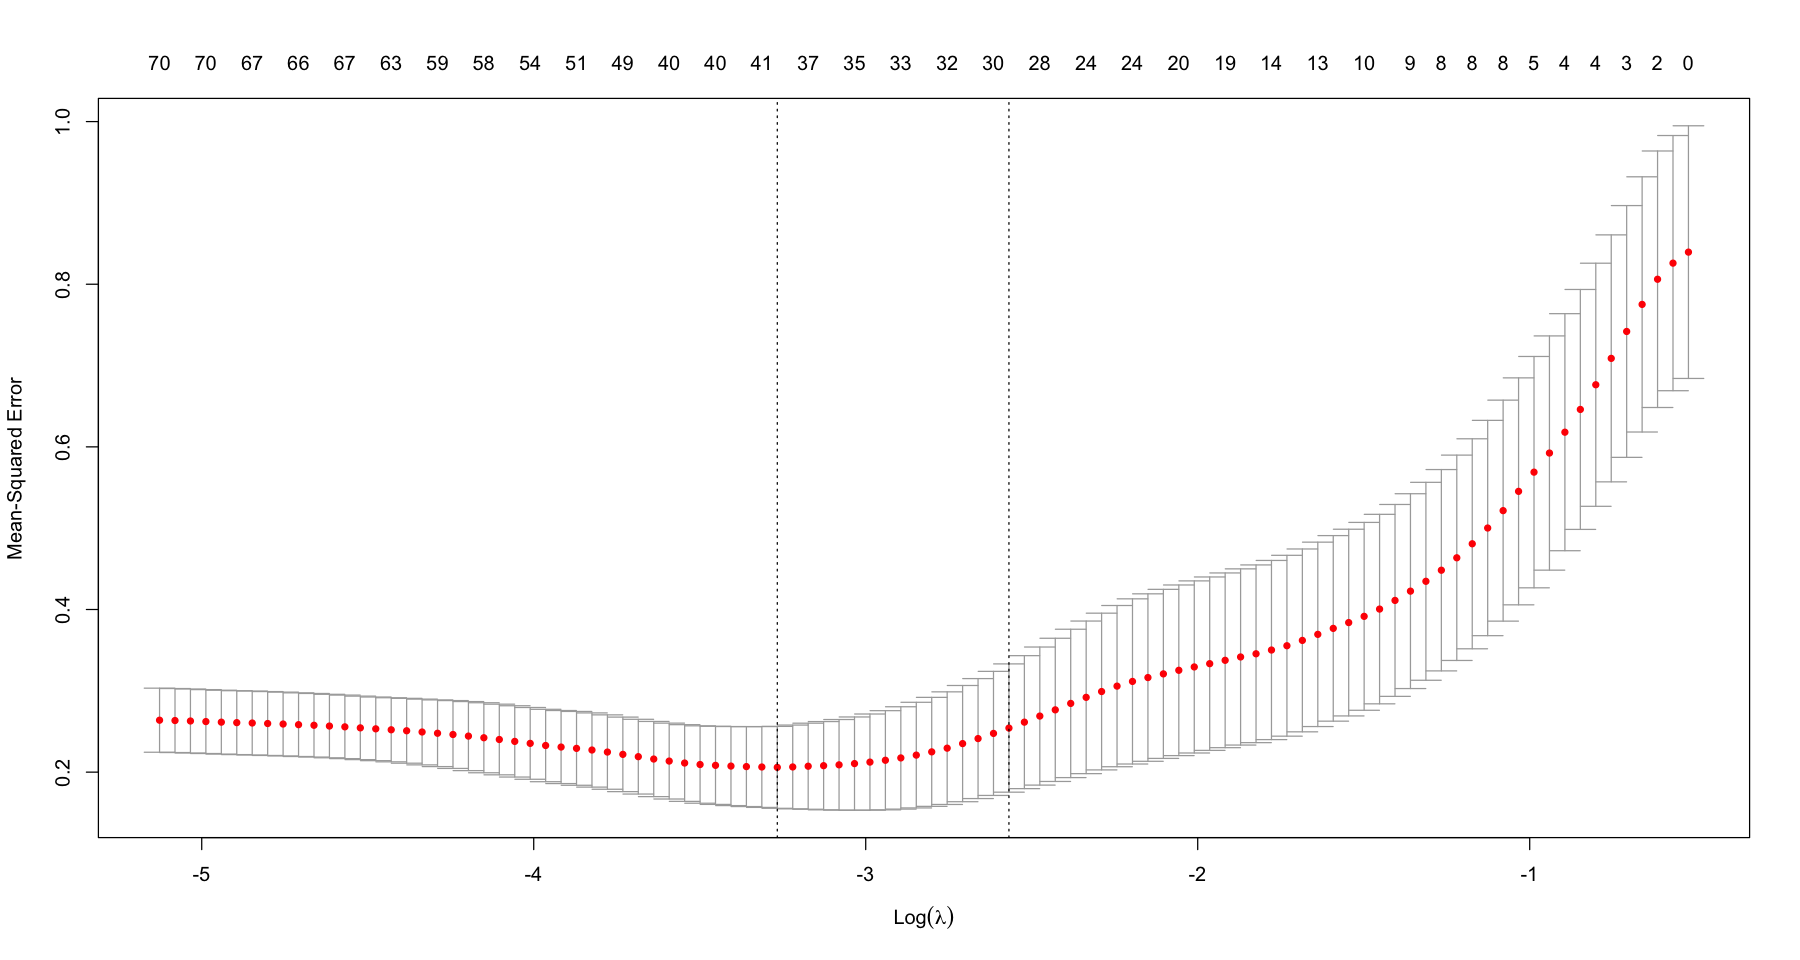

In [45]:
CVL <- cv.glmnet(X, Y, alpha=1)
lambda_lasso <- CVL$lambda.min
plot(CVL)

ML <- glmnet(X, Y, alpha=1)
betahat_lasso <- coef(ML, s=lambda_lasso)

In [46]:
head(betahat_ridge, 10)

10 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -7.1594321193
AADK_at      0.0029222217
AAPA_at     -0.0020285636
ABFA_at      0.0002504776
ABH_at       0.0024082447
ABNA_at      0.0009784310
ABRB_at      0.0005374588
ACCA_at     -0.0013310752
ACCB_at     -0.0022521142
ACCC_at     -0.0035666504

In [47]:
head(betahat_lasso, 10)

10 x 1 sparse Matrix of class "dgCMatrix"
                   s1
(Intercept) -7.159432
AADK_at      .       
AAPA_at      .       
ABFA_at      .       
ABH_at       .       
ABNA_at      .       
ABRB_at      .       
ACCA_at      .       
ACCB_at      .       
ACCC_at      .       

In [48]:
length(betahat_lasso)

[1] 4089

In [49]:
betahat_lasso_final <- betahat_lasso[betahat_lasso[,1]!=0,]
length(betahat_lasso_final)

[1] 43

**d)** Randomly partition the data to training data (70\%, say $\boldsymbol{Y}_{\text {train }}$ and $\boldsymbol{X}_{\text {train }}$ ) and test data (30\%, say $\boldsymbol{Y}_{\text {test }}$ and $\left.\boldsymbol{X}_{\text {test }}\right)$. Apply ridge and lasso regression to the training data and then use the fitted models to predict the response values in the test data. Calculate the mean squared error of predictions for the two methods and discuss which method provides better predictions.

In [50]:
set.seed(42)
train_rows <- sample(1:n, 0.7*n)

X.train <- X[train_rows, ]
X.test <- X[-train_rows, ]
Y.train <- Y[train_rows]
Y.test <- Y[-train_rows]

In [51]:
Yhat_ridge <- predict(MR, X.test, s=lambda_ridge)
MSPE_ridge <- mean((Y.test - Yhat_ridge)^2)

Yhat_lasso <- predict(ML, X.test, s=lambda_lasso)
MSPE_lasso <- mean((Y.test - Yhat_lasso)^2)

In [52]:
MSPE_ridge

[1] 0.02143502

In [53]:
MSPE_lasso

[1] 0.032838

**e)** Note that this and the next parts of question could be tried later as they concern "elastic net regularisation" for correlated variables which will be covered at the end of Chapter 2. In R package `glmnet`, for computational convenience, the elastic net estimator is defined as
$$\hat{\boldsymbol{\beta}}_{\mathrm{EN}}=\underset{\boldsymbol{\beta} \in \mathbb{R}^p}{\operatorname{argmin}}\left\{ \frac{1}{n} \|\boldsymbol{Y}-\boldsymbol{X} \boldsymbol{\beta}\|_2^2+\alpha\|\boldsymbol{\beta}\|_1^1 + \frac{(1-\alpha)}{2} \|\boldsymbol{\beta}\|_2^2\right\}$$
in which $0 \leq \alpha \leq 1$ is a single regularisation parameter. Note that $\alpha=1$ results in the lasso penalty and $\alpha=0$ leads to the ridge penalty. Note also that the factor $1 / n$ is just a normalising constant.

Setting $\alpha=0.5$ in `glmnet`, apply the elastic net to the `riboflavin` data and extract the parameter estimates. What are the estimates with $\alpha=0.8 ?$

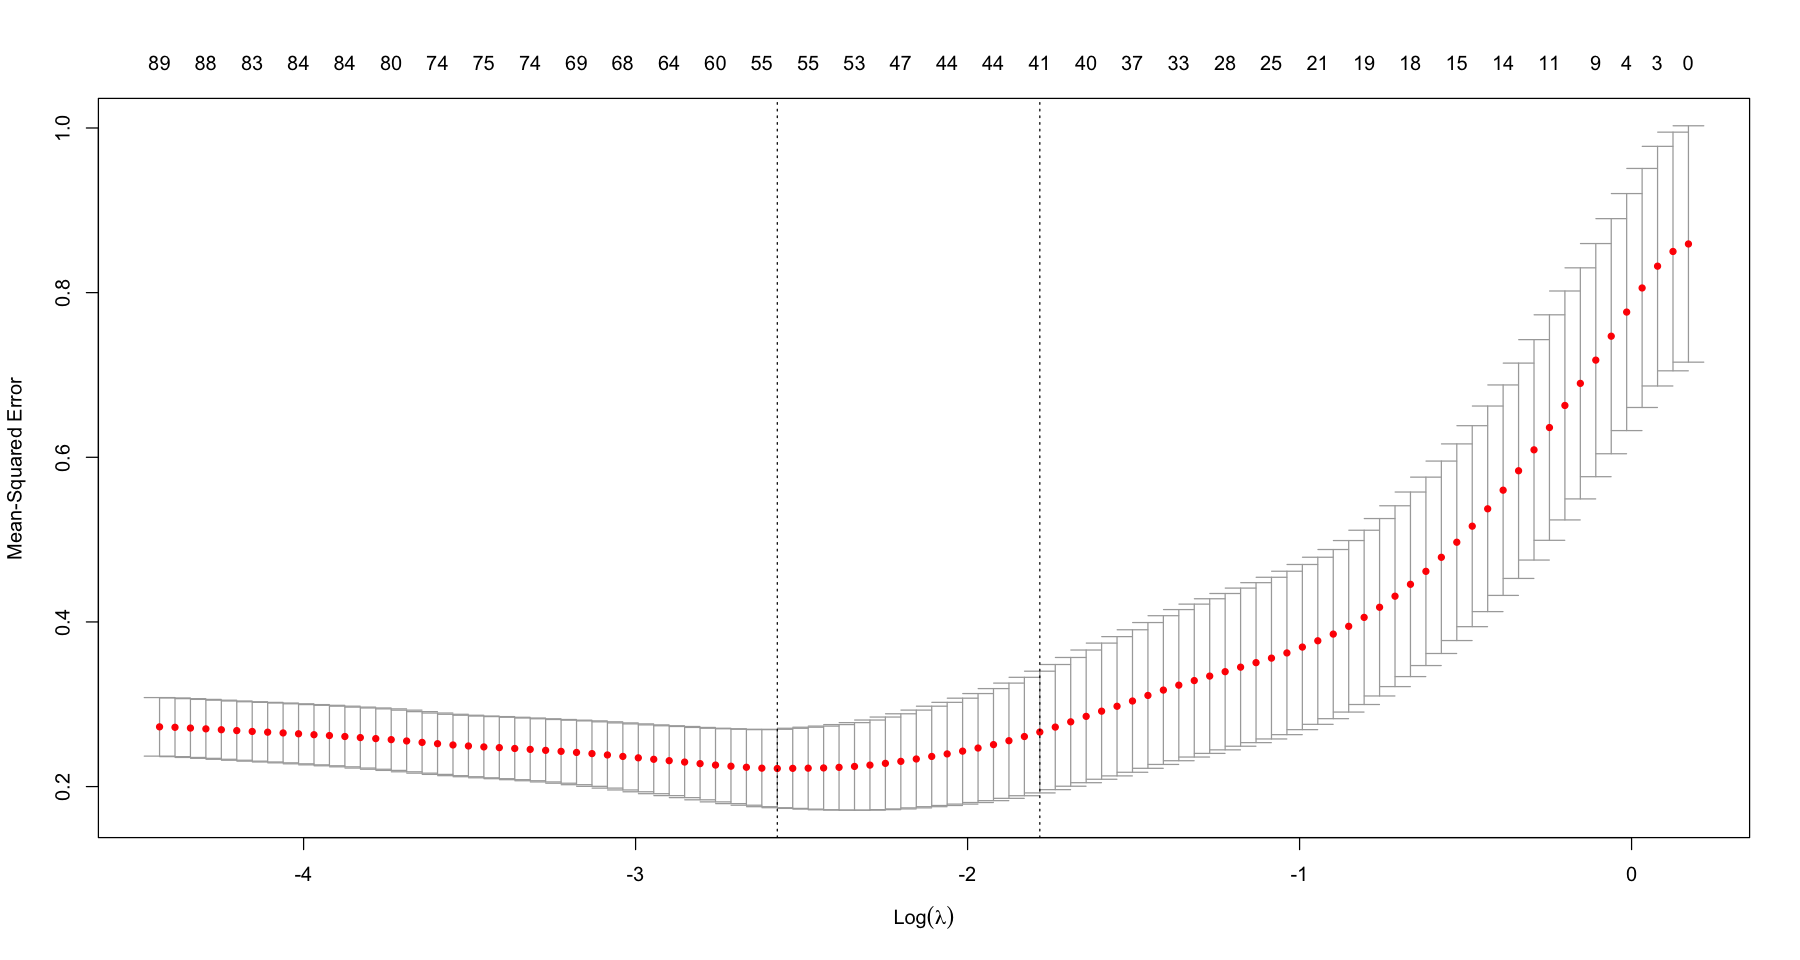

In [54]:
CVE <- cv.glmnet(X, Y, alpha=0.5)
lambda_elastic <- CVE$lambda.min
plot(CVE)

In [55]:
ME <- glmnet(X, Y, alpha=0.5)
betahat_elastic <- coef(ME, s=lambda_elastic)
betahat_elastic_final <- betahat_elastic[betahat_elastic[,1]!=0,]
length(betahat_elastic_final)

[1] 57

Elastic net also gives a sparse solution.

**f)** Use cross validation to find an optimal value of $\alpha$ for the elastic net. For this, consider a range of values for $\alpha$, say $\alpha=\frac{i}{20}$ for $i=0,1, \ldots, 20$, and investigate which one of these $\alpha$ values results in smallest prediction error when applied to randomly selected training $(70 \%)$ and test $(30 \%)$ data. Can this be related to the correlations among genes investigated in Part (b)?

I decided to train 100 models instead of 20 but over same interval of $\alpha$ values.

In [56]:
#alpha_seq <- seq(1/20, 1, len=20)
alpha_seq <- seq(1/100, 1, len=100)

results <- data.frame(alpha = alpha_seq, mse = rep(NA, length(alpha_seq)))

for (alpha in alpha_seq){
    model <- cv.glmnet(X.train, Y.train, alpha=alpha)
    predicted <- predict(model, X.test, s=model$lambda.1se)
    mse <- mean((Y.test - predicted)^2)
    
    results$mse[results$alpha == alpha] <- mse
}

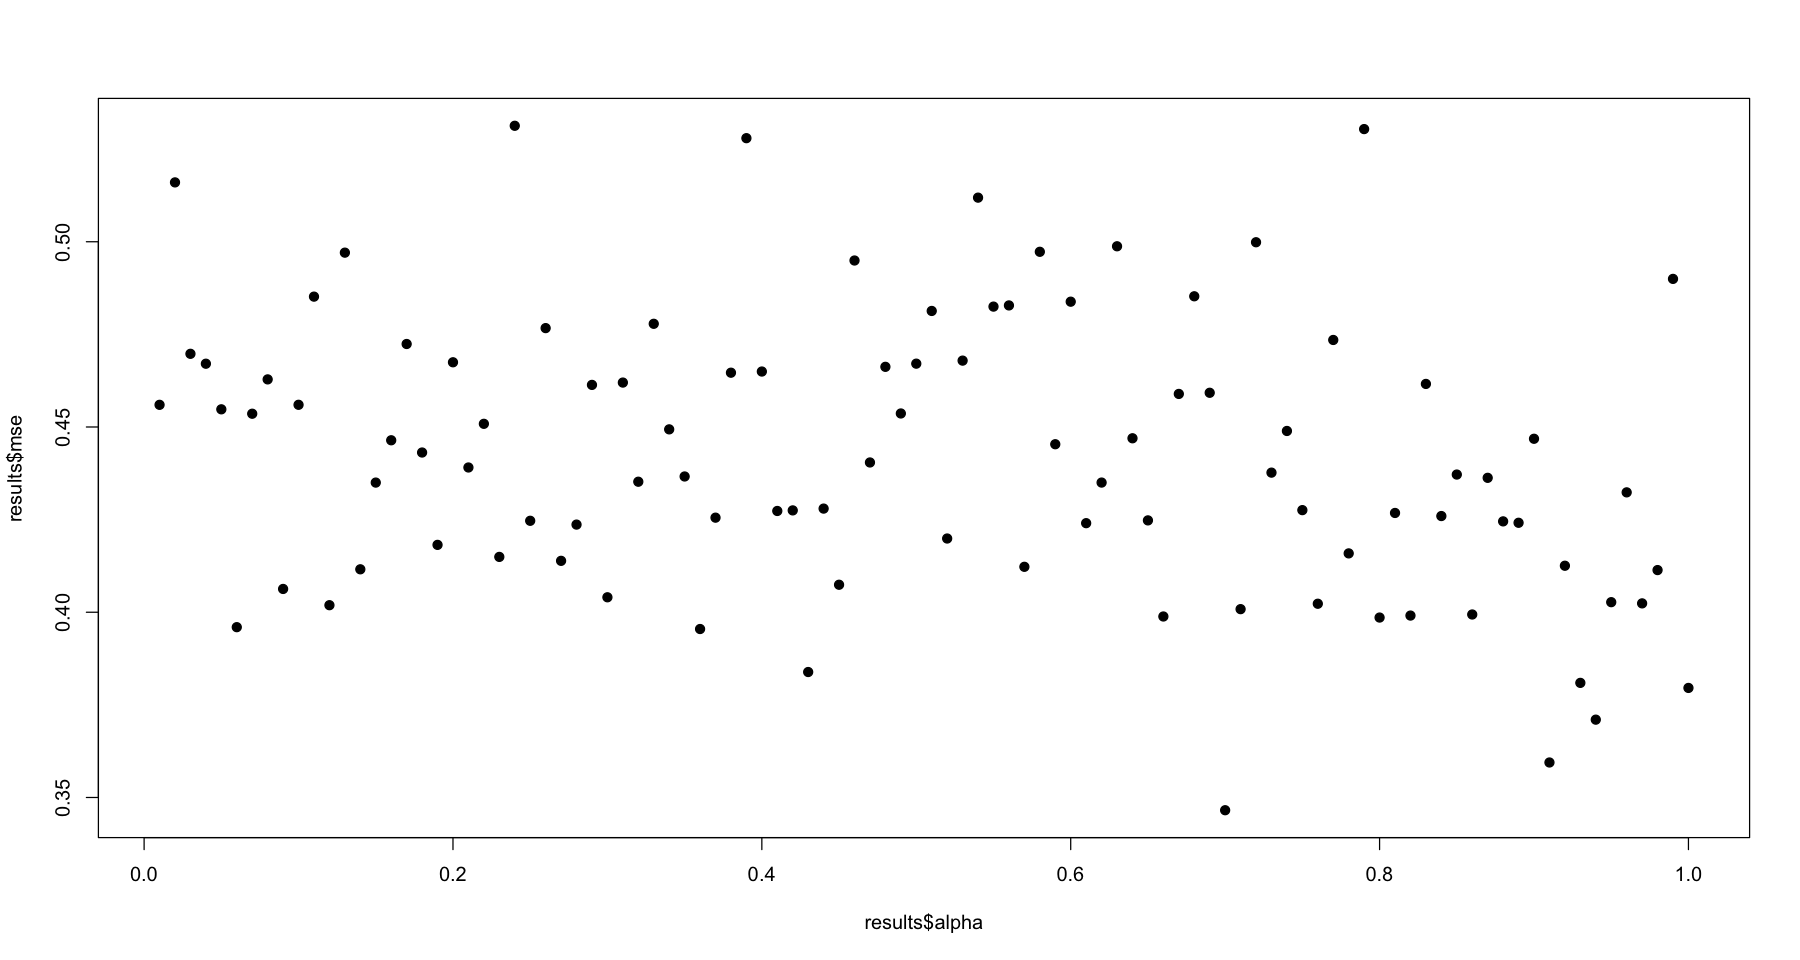

In [57]:
plot(results$alpha, results$mse, pch=19)

In [58]:
alpha_opt <- results$alpha[which.min(results$mse)]
cat("Optimum alpha:", alpha_opt)

Optimum alpha: 0.7

In [59]:
ME2 <- cv.glmnet(X, Y, alpha=alpha_opt)
elastic_net_est <- predict(ME2, type = "coef")
head(elastic_net_est, 10)

10 x 1 sparse Matrix of class "dgCMatrix"
            lambda.1se
(Intercept)  -7.159432
AADK_at       .       
AAPA_at       .       
ABFA_at       .       
ABH_at        .       
ABNA_at       .       
ABRB_at       .       
ACCA_at       .       
ACCB_at       .       
ACCC_at       .       

In [60]:
elastic_net_est <- elastic_net_est[elastic_net_est[,1]!=0,]
length(elastic_net_est)

[1] 34